# Physics 256
## Simpson's Rule

<img src="https://upload.wikimedia.org/wikipedia/en/6/67/Simpsonsrule2.gif" width=500px>

## Last Time

- Solving for the magnetic field
- Approximating integrals
 - Rectangular rule
 - Trapezoidal rule

## Today

- Simpson's rule
- Improper and divergent integrals

## Setting up the Notebook

In [1]:
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline
plt.style.use('notebook');
%config InlineBackend.figure_format = 'retina'
colors = ["#2078B5", "#FF7F0F", "#2CA12C", "#D72827", "#9467BE", "#8C574B",
            "#E478C2", "#808080", "#BCBE20", "#17BED0", "#AEC8E9", "#FFBC79", 
            "#98E08B", "#FF9896", "#C6B1D6", "#C59D94", "#F8B7D3", "#C8C8C8", 
           "#DCDC8E", "#9EDAE6"]

## Better Quadrature

We want to come up with a better scaling approximation to the definite integral:

\begin{equation}
I = \int_a^b f(x) dx
\end{equation}

where we break up the region of integration into $N$ equally sized regions of size:

\begin{equation}
\Delta x = \frac{b-a}{N}.
\end{equation}

Our previous methods approximated the integral of a single panel $I_i = \int_{x_i}^{x_{i+1}} f(x) dx$ using a $0^{th}$ or $1^{st}$ order polynomial.  Now, let's use a $2^{nd}$ order polynomial:

\begin{equation}
P(x) = \alpha + \beta x + \gamma x^2
\end{equation}

where we need to fix the coefficients $\alpha,\beta,\gamma$. Doing this is straightforward but tedius.  The final answer is: 

\begin{equation}
I_i + I_{i+1} \approx \frac{\Delta x}{3} \left[f(x_i) + 4 f(x_{i+1}) + f(x_{i+2}) \right]
\end{equation}

which needs to be summed over all panels:

\begin{equation}
I_{\rm simps} \approx \frac{\Delta x}{3} \left[f(a) + f(b) + 4\sum_{i=1}^{N/2} f(x_{2i-1}) + \sum_{i=1}^{N/2-1} f(x_{2i}) \right]
\end{equation}

<div class="span alert alert-danger">
Note: we need an even number of panels.
</div>

Let's code it up!

In [6]:
def simpsons_rule(f,x,*params):
    '''The trapezoidal rule for numerical integration of f(x) over x.'''
    
    a,b = x[0],x[-1]
    Δx = x[1] - x[0]
    N = x.size
    
    I = (f(a,*params) + f(b,*params))/3.0
    I += (4.0/3.0)*sum([f(a+i*Δx,*params) for i in range(1,N,2)])
    I += (2.0/3.0)*sum([f(a+i*Δx,*params) for i in range(2,N,2)])
    return Δx*I

<div class="span alert alert-success">
<h2>Programming challenge </h2>
Use Simpson's rule to evaluate the error function at $x=1$ and examine how the error (as computed by comparing with the exact result in scipy.special.erf scales with $\Delta x$.
</div>

\begin{equation}
\mathrm{erf}(x) = \frac{2}{\sqrt{\pi}} \int_0^x \mathrm{e}^{-t^2} dt 
\end{equation}

In [30]:
from scipy.constants import pi as  π
from scipy.special import erf

def erf_kernel(t):
    '''The error function kernel.'''
    return 2.0/np.sqrt(π)*np.exp(-t*t)
    
N = np.array([2**n for n in range(2,10)])
Δx = []
error = []
for j,cN in enumerate(N):
    x = np.linspace(0,1,cN)
    error.append(np.abs(simpsons_rule(erf_kernel,x))-erf(1.0))
error = np.array(error)  
print(error,N)
#plt.plot(Δx,error)

[ 0.1228301   0.05647147  0.02705859  0.01324656  0.00655414  0.00325998
  0.00162574  0.00081181] [  4   8  16  32  64 128 256 512]


(0, 1.1)

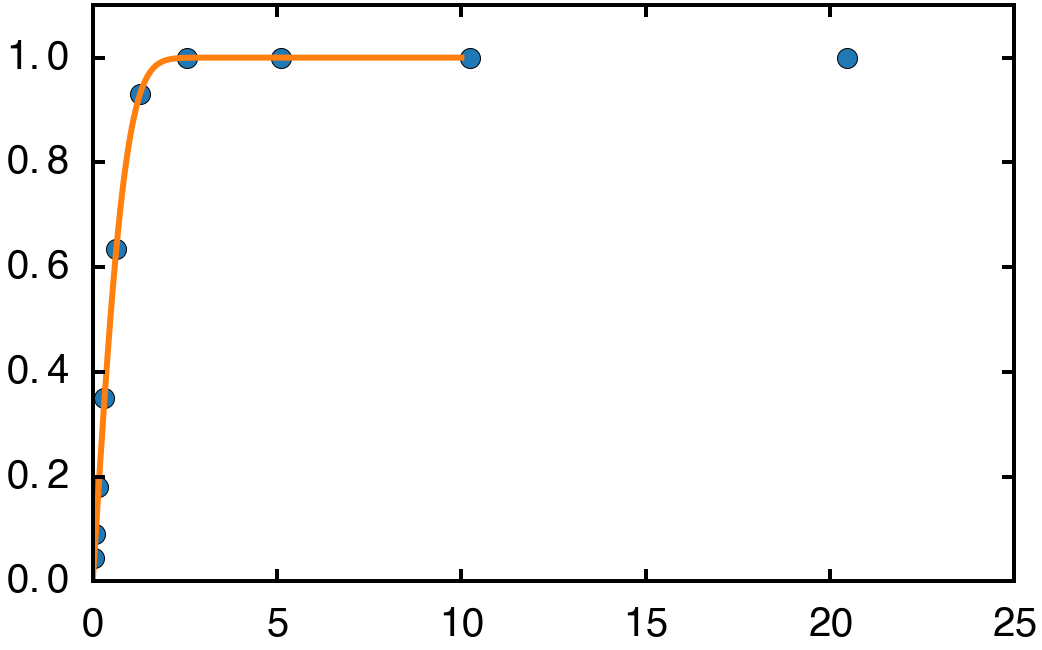

In [35]:
Δx = 0.01
N = np.array([2**n for n in range(2,12)])

res = []
x = []
for cN in N:
    cx = np.arange(0,cN*Δx,Δx)
    res.append(simpsons_rule(erf_kernel,cx))
    x.append(cx[-1])
             
plt.plot(x,res,'o')
ex = np.linspace(0,10,1000)
plt.plot(ex,erf(ex))
    
plt.ylim(0,1.1)